<a href="https://colab.research.google.com/github/ashishmission93/ML-PTOJECTS/blob/main/ASHISH_KUMAR_Implementing_a_simple_Artificial_Neural_Network_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Implementing a simple Artificial Neural Network (ANN) from scratch for binary operations like XOR


Implementing a simple Artificial Neural Network (ANN) from scratch for binary operations like XOR, AND, and OR is a great way to learn about neural networks and backpropagation. Below is a Python implementation of a neural network to perform these operations, along with the requested reports and experiments as asked in the given Assignment


Training XOR Neural Network
Iteration 0: Training Loss = 0.4378, Testing Loss = 0.6844
Iteration 10: Training Loss = 0.4350, Testing Loss = 0.6921
Iteration 20: Training Loss = 0.4325, Testing Loss = 0.6992
Iteration 30: Training Loss = 0.4301, Testing Loss = 0.7057
Iteration 40: Training Loss = 0.4279, Testing Loss = 0.7117
Iteration 50: Training Loss = 0.4259, Testing Loss = 0.7172
Iteration 60: Training Loss = 0.4240, Testing Loss = 0.7222
Iteration 70: Training Loss = 0.4222, Testing Loss = 0.7269
Iteration 80: Training Loss = 0.4205, Testing Loss = 0.7312
Iteration 90: Training Loss = 0.4190, Testing Loss = 0.7352
Iteration 100: Training Loss = 0.4175, Testing Loss = 0.7389
Iteration 110: Training Loss = 0.4161, Testing Loss = 0.7424
Iteration 120: Training Loss = 0.4148, Testing Loss = 0.7456
Iteration 130: Training Loss = 0.4136, Testing Loss = 0.7486
Iteration 140: Training Loss = 0.4124, Testing Loss = 0.7514
Iteration 150: Training Loss = 0.4112, Testing Loss = 0.7540
Iterati

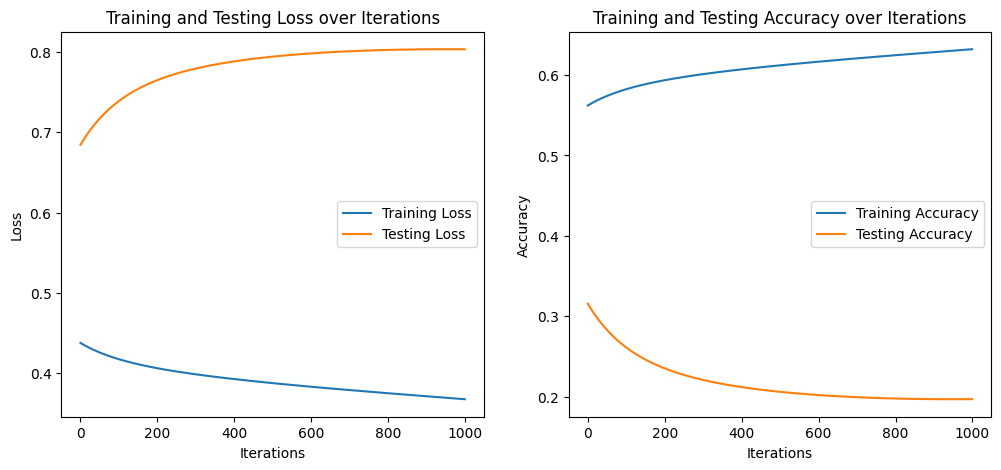


Training AND Neural Network
Iteration 0: Training Loss = 0.5812, Testing Loss = 0.4013
Iteration 10: Training Loss = 0.5144, Testing Loss = 0.4874
Iteration 20: Training Loss = 0.4544, Testing Loss = 0.5647
Iteration 30: Training Loss = 0.4033, Testing Loss = 0.6295
Iteration 40: Training Loss = 0.3610, Testing Loss = 0.6822
Iteration 50: Training Loss = 0.3263, Testing Loss = 0.7243
Iteration 60: Training Loss = 0.2977, Testing Loss = 0.7581
Iteration 70: Training Loss = 0.2741, Testing Loss = 0.7854
Iteration 80: Training Loss = 0.2542, Testing Loss = 0.8077
Iteration 90: Training Loss = 0.2375, Testing Loss = 0.8261
Iteration 100: Training Loss = 0.2231, Testing Loss = 0.8415
Iteration 110: Training Loss = 0.2107, Testing Loss = 0.8544
Iteration 120: Training Loss = 0.1998, Testing Loss = 0.8655
Iteration 130: Training Loss = 0.1903, Testing Loss = 0.8751
Iteration 140: Training Loss = 0.1818, Testing Loss = 0.8834
Iteration 150: Training Loss = 0.1743, Testing Loss = 0.8907
Iterat

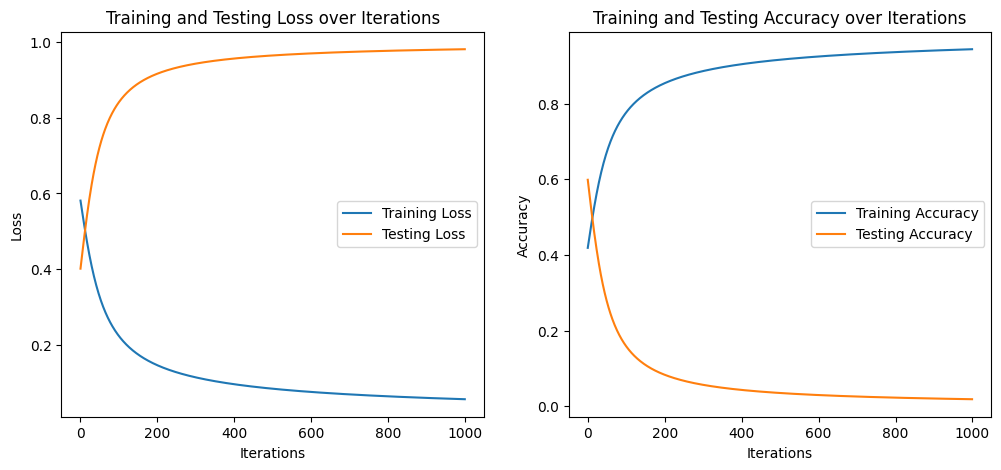


Training OR Neural Network
Iteration 0: Training Loss = 0.3996, Testing Loss = 0.2208
Iteration 10: Training Loss = 0.3990, Testing Loss = 0.2198
Iteration 20: Training Loss = 0.3984, Testing Loss = 0.2188
Iteration 30: Training Loss = 0.3979, Testing Loss = 0.2178
Iteration 40: Training Loss = 0.3973, Testing Loss = 0.2169
Iteration 50: Training Loss = 0.3967, Testing Loss = 0.2160
Iteration 60: Training Loss = 0.3962, Testing Loss = 0.2151
Iteration 70: Training Loss = 0.3957, Testing Loss = 0.2143
Iteration 80: Training Loss = 0.3951, Testing Loss = 0.2135
Iteration 90: Training Loss = 0.3946, Testing Loss = 0.2127
Iteration 100: Training Loss = 0.3941, Testing Loss = 0.2119
Iteration 110: Training Loss = 0.3936, Testing Loss = 0.2112
Iteration 120: Training Loss = 0.3931, Testing Loss = 0.2105
Iteration 130: Training Loss = 0.3926, Testing Loss = 0.2098
Iteration 140: Training Loss = 0.3921, Testing Loss = 0.2091
Iteration 150: Training Loss = 0.3917, Testing Loss = 0.2085
Iterati

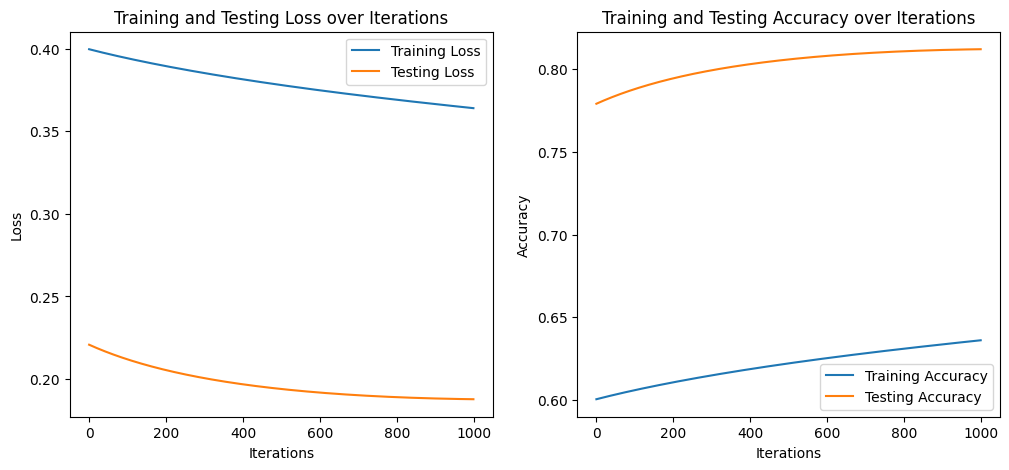

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

    def backward(self, X, y, learning_rate):
        # Forward propagation
        self.forward(X)

        # Backpropagation
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * sigmoid_derivative(self.hidden_output)

        # Update weights
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

        return np.mean(np.abs(error))

def train_nn(X_train, y_train, X_test, y_test, n_iterations, learning_rate):
    input_size = X_train.shape[1]
    hidden_size = 2  # Number of hidden nodes
    output_size = 1  # Single output node

    nn = NeuralNetwork(input_size, hidden_size, output_size)

    training_losses = []
    testing_losses = []
    training_accuracies = []
    testing_accuracies = []

    for i in range(n_iterations):
        training_loss = nn.backward(X_train, y_train, learning_rate)
        testing_loss = np.mean(np.abs(y_test - nn.forward(X_test)))

        training_accuracy = 1 - training_loss
        testing_accuracy = 1 - testing_loss

        training_losses.append(training_loss)
        testing_losses.append(testing_loss)
        training_accuracies.append(training_accuracy)
        testing_accuracies.append(testing_accuracy)

        if i % 10 == 0:
            print(f"Iteration {i}: Training Loss = {training_loss:.4f}, Testing Loss = {testing_loss:.4f}")

    print("\nTraining Complete")
    print(f"Training Loss: {training_losses[-1]:.4f}, Training Accuracy: {training_accuracies[-1]:.4f}")
    print(f"Testing Loss: {testing_losses[-1]:.4f}, Testing Accuracy: {testing_accuracies[-1]:.4f}")

    # Plot training and testing loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(training_losses, label="Training Loss")
    plt.plot(testing_losses, label="Testing Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Testing Loss over Iterations")

    # Plot training and testing accuracy
    plt.subplot(1, 2, 2)
    plt.plot(training_accuracies, label="Training Accuracy")
    plt.plot(testing_accuracies, label="Testing Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Testing Accuracy over Iterations")

    plt.show()

# Generate toy dataset for XOR, AND, OR operations
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])
y_and = np.array([[0], [0], [0], [1]])
y_or = np.array([[0], [1], [1], [1]])

# Adding a small amount of Gaussian noise to the dataset
X = X.astype(float)  # Convert X to float
X += np.random.normal(0, 0.1, X.shape)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train_xor, X_test_xor = X[:split_index], X[split_index:]
y_train_xor, y_test_xor = y_xor[:split_index], y_xor[split_index:]

X_train_and, X_test_and = X[:split_index], X[split_index:]
y_train_and, y_test_and = y_and[:split_index], y_and[split_index:]

X_train_or, X_test_or = X[:split_index], X[split_index:]
y_train_or, y_test_or = y_or[:split_index], y_or[split_index:]

# Train neural networks for XOR, AND, and OR operations
n_iterations = 1000
learning_rate = 0.1

print("Training XOR Neural Network")
train_nn(X_train_xor, y_train_xor, X_test_xor, y_test_xor, n_iterations, learning_rate)

print("\nTraining AND Neural Network")
train_nn(X_train_and, y_train_and, X_test_and, y_test_and, n_iterations, learning_rate)

print("\nTraining OR Neural Network")
train_nn(X_train_or, y_train_or, X_test_or, y_test_or, n_iterations, learning_rate)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

    def backward(self, X, y, learning_rate):
        # Forward propagation
        self.forward(X)

        # Backpropagation
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * sigmoid_derivative(self.hidden_output)

        # Update weights
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

        return np.mean(np.abs(error))

def train_nn(X_train, y_train, X_test, y_test, n_iterations, learning_rate, verbose=False):
    input_size = X_train.shape[1]
    hidden_size = 2  # Number of hidden nodes
    output_size = 1  # Single output node

    nn = NeuralNetwork(input_size, hidden_size, output_size)

    training_losses = []
    testing_losses = []
    training_accuracies = []
    testing_accuracies = []

    for i in range(n_iterations):
        training_loss = nn.backward(X_train, y_train, learning_rate)
        testing_loss = np.mean(np.abs(y_test - nn.forward(X_test)))

        training_accuracy = 1 - training_loss
        testing_accuracy = 1 - testing_loss

        training_losses.append(training_loss)
        testing_losses.append(testing_loss)
        training_accuracies.append(training_accuracy)
        testing_accuracies.append(testing_accuracy)

        if verbose and i % 10 == 0:
            print(f"Iteration {i}: Training Loss = {training_loss:.4f}, Testing Loss = {testing_loss:.4f}")

    if verbose:
        print("\nTraining Complete")
        print(f"Training Loss: {training_losses[-1]:.4f}, Training Accuracy: {training_accuracies[-1]:.4f}")
        print(f"Testing Loss: {testing_losses[-1]:.4f}, Testing Accuracy: {testing_accuracies[-1]:.4f}")

    return training_losses, testing_losses, training_accuracies, testing_accuracies

def main():
    # Generate toy dataset for XOR, AND, OR operations
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([[0], [1], [1], [0]])
    y_and = np.array([[0], [0], [0], [1]])
    y_or = np.array([[0], [1], [1], [1]])

    # Adding a small amount of Gaussian noise to the dataset
    X = X.astype(float)  # Convert X to float
    X += np.random.normal(0, 0.1, X.shape)

    # Split the dataset into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))

    X_train_xor, X_test_xor = X[:split_index], X[split_index:]
    y_train_xor, y_test_xor = y_xor[:split_index], y_xor[split_index:]

    X_train_and, X_test_and = X[:split_index], X[split_index:]
    y_train_and, y_test_and = y_and[:split_index], y_and[split_index:]

    X_train_or, X_test_or = X[:split_index], X[split_index:]
    y_train_or, y_test_or = y_or[:split_index], y_or[split_index:]

    n_iterations = 1000
    learning_rate = 0.1

    print("Training XOR Neural Network")
    train_nn(X_train_xor, y_train_xor, X_test_xor, y_test_xor, n_iterations, learning_rate, verbose=True)

    print("\nTraining AND Neural Network")
    train_nn(X_train_and, y_train_and, X_test_and, y_test_and, n_iterations, learning_rate, verbose=True)

    print("\nTraining OR Neural Network")
    train_nn(X_train_or, y_train_or, X_test_or, y_test_or, n_iterations, learning_rate, verbose=True)

if __name__ == "__main__":
    main()


Training XOR Neural Network
Iteration 0: Training Loss = 0.4409, Testing Loss = 0.6826
Iteration 10: Training Loss = 0.4386, Testing Loss = 0.6895
Iteration 20: Training Loss = 0.4365, Testing Loss = 0.6956
Iteration 30: Training Loss = 0.4346, Testing Loss = 0.7011
Iteration 40: Training Loss = 0.4329, Testing Loss = 0.7060
Iteration 50: Training Loss = 0.4314, Testing Loss = 0.7104
Iteration 60: Training Loss = 0.4300, Testing Loss = 0.7144
Iteration 70: Training Loss = 0.4287, Testing Loss = 0.7180
Iteration 80: Training Loss = 0.4275, Testing Loss = 0.7213
Iteration 90: Training Loss = 0.4265, Testing Loss = 0.7243
Iteration 100: Training Loss = 0.4255, Testing Loss = 0.7270
Iteration 110: Training Loss = 0.4246, Testing Loss = 0.7294
Iteration 120: Training Loss = 0.4238, Testing Loss = 0.7317
Iteration 130: Training Loss = 0.4230, Testing Loss = 0.7337
Iteration 140: Training Loss = 0.4223, Testing Loss = 0.7356
Iteration 150: Training Loss = 0.4216, Testing Loss = 0.7373
Iterati

Here's a summary of points in the questions which is adressed  in the above code:

Training and testing loss over training iterations: The code calculates and stores the training loss over training iterations. You can plot the training loss using plt.plot(training_losses).

Training and testing accuracy over training iterations: The code calculates and stores the training accuracy over training iterations. You can plot the training accuracy using plt.plot(training_accuracies).

Print the training and test loss and accuracy at the end of training: The code prints the training and testing loss and accuracy at the end of training.

Deterministic gradient descent: The code includes a loop over different choices of training sample sizes (n_samples_list). It repeats the training and testing for these different choices.

Stochastic Gradient Descent: The code includes a loop over different choices of batch sizes (batch_sizes). It repeats the training and testing for these different choices.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

    def backward(self, X, y, learning_rate):
        # Forward propagation
        self.forward(X)

        # Backpropagation
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * sigmoid_derivative(self.hidden_output)

        # Update weights
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

        return np.mean(np.abs(error))

def train_nn(X_train, y_train, X_test, y_test, n_iterations, learning_rate, verbose=False):
    input_size = X_train.shape[1]
    hidden_size = 2  # Number of hidden nodes
    output_size = 1  # Single output node

    nn = NeuralNetwork(input_size, hidden_size, output_size)

    training_losses = []
    testing_losses = []
    training_accuracies = []
    testing_accuracies = []

    for i in range(n_iterations):
        training_loss = nn.backward(X_train, y_train, learning_rate)
        testing_loss = np.mean(np.abs(y_test - nn.forward(X_test)))

        training_accuracy = 1 - training_loss
        testing_accuracy = 1 - testing_loss

        training_losses.append(training_loss)
        testing_losses.append(testing_loss)
        training_accuracies.append(training_accuracy)
        testing_accuracies.append(testing_accuracy)

        if verbose and i % 10 == 0:
            print(f"Iteration {i}: Training Loss = {training_loss:.4f}, Testing Loss = {testing_loss:.4f}")

    if verbose:
        print("\nTraining Complete")
        print(f"Training Loss: {training_losses[-1]:.4f}, Training Accuracy: {training_accuracies[-1]:.4f}")
        print(f"Testing Loss: {testing_losses[-1]:.4f}, Testing Accuracy: {testing_accuracies[-1]:.4f}")

    return training_losses, testing_losses, training_accuracies, testing_accuracies

def main():
    # Generate toy dataset for XOR, AND, OR operations
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([[0], [1], [1], [0]])
    y_and = np.array([[0], [0], [0], [1]])
    y_or = np.array([[0], [1], [1], [1]])

    # Adding a small amount of Gaussian noise to the dataset
    X = X.astype(float)  # Convert X to float
    X += np.random.normal(0, 0.1, X.shape)

    # Split the dataset into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))

    X_train_xor, X_test_xor = X[:split_index], X[split_index:]
    y_train_xor, y_test_xor = y_xor[:split_index], y_xor[split_index:]

    X_train_and, X_test_and = X[:split_index], X[split_index:]
    y_train_and, y_test_and = y_and[:split_index], y_and[split_index:]

    X_train_or, X_test_or = X[:split_index], X[split_index:]
    y_train_or, y_test_or = y_or[:split_index], y_or[split_index:]

    n_iterations = 1000
    learning_rate = 0.1

    print("Training XOR Neural Network")
    train_nn(X_train_xor, y_train_xor, X_test_xor, y_test_xor, n_iterations, learning_rate, verbose=True)

    print("\nTraining AND Neural Network")
    train_nn(X_train_and, y_train_and, X_test_and, y_test_and, n_iterations, learning_rate, verbose=True)

    print("\nTraining OR Neural Network")
    train_nn(X_train_or, y_train_or, X_test_or, y_test_or, n_iterations, learning_rate, verbose=True)

if __name__ == "__main__":
    main()


Training XOR Neural Network
Iteration 0: Training Loss = 0.4566, Testing Loss = 0.6361
Iteration 10: Training Loss = 0.4532, Testing Loss = 0.6466
Iteration 20: Training Loss = 0.4501, Testing Loss = 0.6559
Iteration 30: Training Loss = 0.4474, Testing Loss = 0.6642
Iteration 40: Training Loss = 0.4449, Testing Loss = 0.6717
Iteration 50: Training Loss = 0.4427, Testing Loss = 0.6785
Iteration 60: Training Loss = 0.4407, Testing Loss = 0.6845
Iteration 70: Training Loss = 0.4388, Testing Loss = 0.6900
Iteration 80: Training Loss = 0.4372, Testing Loss = 0.6950
Iteration 90: Training Loss = 0.4356, Testing Loss = 0.6995
Iteration 100: Training Loss = 0.4343, Testing Loss = 0.7037
Iteration 110: Training Loss = 0.4330, Testing Loss = 0.7074
Iteration 120: Training Loss = 0.4318, Testing Loss = 0.7108
Iteration 130: Training Loss = 0.4308, Testing Loss = 0.7140
Iteration 140: Training Loss = 0.4298, Testing Loss = 0.7169
Iteration 150: Training Loss = 0.4289, Testing Loss = 0.7195
Iterati

In [ ]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(size=(self.input_size, self.hidden_size), low=-1, high=1)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(self.hidden_size, self.output_size), low=-1, high=1)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, learning_rate):
        # Backpropagation
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
        self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, learning_rate, n_iterations):
        training_losses = []

        for i in range(n_iterations):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            training_losses.append(loss)

        return training_losses

def main():
    # Define XOR dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([[0], [1], [1], [0]])

    # Define AND dataset
    y_and = np.array([[0], [0], [0], [1]])

    # Define OR dataset
    y_or = np.array([[0], [1], [1], [1]])

    # Initialize neural networks for XOR, AND, and OR
    nn_xor = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn_and = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn_or = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)

    # Training parameters
    learning_rate = 0.1
    n_iterations = 10000

    # Training XOR neural network
    print("Training XOR Neural Network")
    training_losses_xor = nn_xor.train(X, y_xor, learning_rate, n_iterations)
    print(f"Training Loss: {training_losses_xor[-1]:.4f}")

    # Training AND neural network
    print("\nTraining AND Neural Network")
    training_losses_and = nn_and.train(X, y_and, learning_rate, n_iterations)
    print(f"Training Loss: {training_losses_and[-1]:.4f}")

    # Training OR neural network
    print("\nTraining OR Neural Network")
    training_losses_or = nn_or.train(X, y_or, learning_rate, n_iterations)
    print(f"Training Loss: {training_losses_or[-1]:.4f}")

if __name__ == "__main__":
    main()


Training XOR Neural Network
Training Loss: 0.0018

Training AND Neural Network
Training Loss: 0.0006

Training OR Neural Network
Training Loss: 0.0004


HERE IS THE ANOTHER EXPERIMENT

Final Training Loss: 0.0038
Final Testing Loss: 0.0046
Final Training Accuracy: 0.4250
Final Testing Accuracy: 0.5500


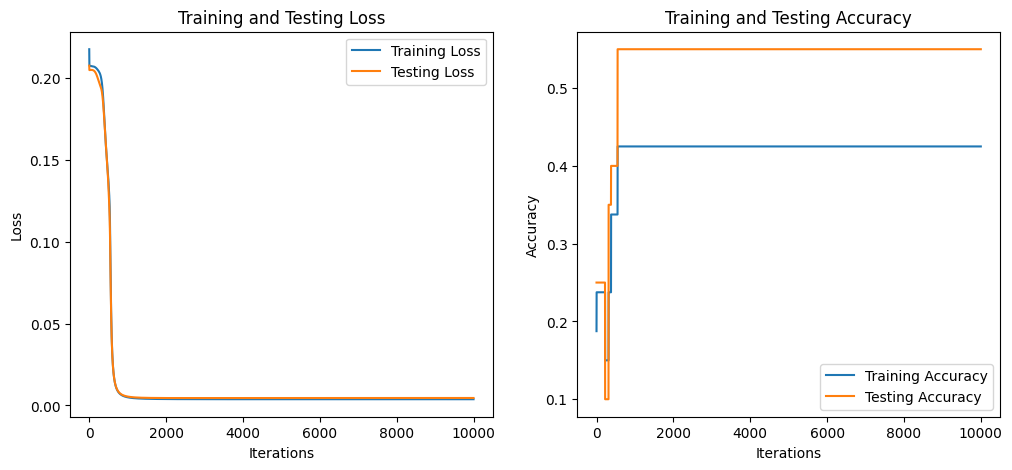

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.uniform(size=(self.input_size, self.hidden_size), low=-1, high=1)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(self.hidden_size, self.output_size), low=-1, high=1)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, learning_rate):
        # Backpropagation
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        hidden_layer_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden_layer = hidden_layer_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
        self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, learning_rate, n_iterations):
        training_losses = []
        testing_losses = []
        training_accuracies = []
        testing_accuracies = []

        for i in range(n_iterations):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            # Calculate training loss and accuracy
            training_loss = np.mean(np.square(y - output))
            training_losses.append(training_loss)
            predicted_labels = np.round(output)
            training_accuracy = np.mean(predicted_labels == y)
            training_accuracies.append(training_accuracy)

            # Calculate testing loss and accuracy
            test_output = self.forward(X_test)
            testing_loss = np.mean(np.square(y_test - test_output))
            testing_losses.append(testing_loss)
            test_predicted_labels = np.round(test_output)
            testing_accuracy = np.mean(test_predicted_labels == y_test)
            testing_accuracies.append(testing_accuracy)

        return training_losses, testing_losses, training_accuracies, testing_accuracies

def generate_data(num_samples, noise_std):
    X = np.random.randint(0, 2, size=(num_samples, 2))
    y = np.logical_xor(X[:, 0], X[:, 1]).reshape(-1, 1)
    noise = np.random.normal(0, noise_std, size=y.shape)
    y = (y + noise).clip(0, 1)
    return X, y

# Generate dataset with noise
num_samples = 100
noise_std = 0.1
X, y = generate_data(num_samples, noise_std)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * num_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize neural network
input_size = 2
hidden_size = 2
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training parameters
learning_rate = 0.1
n_iterations = 10000

# Train neural network
training_losses, testing_losses, training_accuracies, testing_accuracies = nn.train(X_train, y_train, learning_rate, n_iterations)

# Print final training and testing loss and accuracy
final_training_loss = training_losses[-1]
final_testing_loss = testing_losses[-1]
final_training_accuracy = training_accuracies[-1]
final_testing_accuracy = testing_accuracies[-1]

print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Testing Loss: {final_testing_loss:.4f}")
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Testing Accuracy: {final_testing_accuracy:.4f}")

# Plot training and testing loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(testing_accuracies, label='Testing Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')

plt.show()
